# Avaliação e Generalização de Modelos de Machine Learning

A avaliação do desempenho de um modelo de Machine Learning está diretamente relacionada à sua capacidade de generalização. Generalização é a capacidade do modelo de fazer previsões precisas em dados não vistos anteriormente. Em outras palavras, queremos que nosso modelo aprenda padrões reais nos dados, em vez de simplesmente memorar o conjunto de treinamento.

## O Método de Holdout

Um método comum para avaliar a capacidade de generalização de um modelo é o Método de Holdout. Nesse método, dividimos nosso conjunto de dados em duas partes: um conjunto de treinamento, que geralmente corresponde a cerca de 70% dos dados, e um conjunto de teste, que contém os restantes 30%.

Imagine que temos um conjunto de dados com 9 observaçõe

```
GrLivArea    SalePrice
0    1710       208500
1    1262       181500
2    1786       223500
3    1717       140000
4    2198       2
```

Podemos realizar essa divisão da seguinte forma:


```s:

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Criar um DataFrame de exemplo
np.random.seed(42)  # Para tornar os resultados reproduzíveis
data = {
    'GrLivArea': np.random.randint(1000, 3000, size=100),  # Exemplo de área de estar
    'SalePrice': np.random.randint(50000, 300000, size=100)  # Exemplo de preço de venda
}

livecode_data = pd.DataFrame(data)

# Dividir os dados em treinamento e teste
train_data, test_data = train_test_split(livecode_data, test_size=0.3)

# Preparar X e y
X_train = train_data[['GrLivArea']]
y_train = train_data['SalePrice']

X_test = test_data[['GrLivArea']]
y_test = test_data['SalePrice']

# Instanciar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Avaliar o desempenho do modelo nos dados de teste
score = model.score(X_test, y_test)

print("Score do modelo:", score)


Score do modelo: -0.001062352106608655


Alternativamente, podemos usar o método train_test_split diretamente nos conjuntos X e y:

In [6]:
# Preparar X e y
X = livecode_data[['GrLivArea']]
y = livecode_data['SalePrice']

# Dividir em treinamento/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Uma vez que temos nossos conjuntos de treinamento e teste, podemos prosseguir com o treinamento e avaliação do modelo.

## Treinamento e Avaliação do Modelo

Vamos supor que estamos construindo um modelo de regressão linear para prever os preços de venda (SalePrice) com base na área de estar (GrLivArea). O processo de treinamento e avaliação do modelo seria o seguinte:

In [8]:
# Instanciar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Avaliar o desempenho do modelo nos dados de teste
score = model.score(X_test, y_test)

score

-0.0178161028321151

O resultado score nos dá uma medida de quão bem nosso modelo está generalizando. No entanto, o Método de Holdout tem algumas limitações que devemos estar cientes.

## Limitações do Método de Holdout

**Aleatoriedade na Divisão**

Uma das limitações é que a divisão dos dados em conjuntos de treinamento e teste é aleatória. Isso significa que diferentes divisões aleatórias podem levar a resultados diferentes. Por exemplo, ao executar o código de divisão várias vezes, podemos obter pontuações ligeiramente diferentes.

In [9]:
# Dividir em treinamento/teste (executado várias vezes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
X_train

,GrLivArea
20,2685
35,1252
71,2369
6,2724
78,2478
...,...
56,2528
85,2104
50,1957
15,2396


In [11]:
X_test

,GrLivArea
27,1385
13,2482
5,2095
29,1955
21,2332
19,1130
83,1034
14,1087
26,1805
90,2025


**Perda de Informação**

Outra limitação é que os dados no conjunto de teste não são usados para treinar o modelo. Isso pode ser um problema se você tiver um conjunto de dados pequeno, pois a perda de dados de treinamento pode ser significativa.

## Como Resolver Essas Limitações

Uma maneira de lidar com a aleatoriedade na divisão dos dados é calcular a média das pontuações de várias divisões de holdout. Isso pode fornecer uma estimativa mais estável do desempenho do modelo.

No entanto, uma abordagem ainda melhor é usar a validação cruzada K-Fold.

## Validação Cruzada K-Fold

Na validação cruzada K-Fold, o conjunto de dados é dividido em K partes (ou "dobras"). O modelo é treinado e avaliado K vezes, cada vez usando uma dobra diferente como conjunto de teste e as outras dobras como conjunto de treinamento. A pontuação média das K iterações é usada como a métrica final de desempenho do modelo.

Por exemplo, podemos realizar uma validação cruzada K-Fold com um modelo de regressão linear da seguinte forma:

In [12]:
from sklearn.model_selection import cross_validate

# Instanciar o modelo
model = LinearRegression()

# Realizar validação cruzada com K=5
cv_results = cross_validate(model, X, y, cv=5)

# Pontuações de teste para cada dobra
cv_scores = cv_results['test_score']

# Média das pontuações de teste
mean_score = cv_scores.mean()

In [13]:
mean_score

-0.16979642469222123

A escolha de K é um equilíbrio entre uma avaliação de desempenho confiável e o custo computacional. Normalmente, valores comuns de K são 5 ou 10.

### Em um código mais completo, k-fold

/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

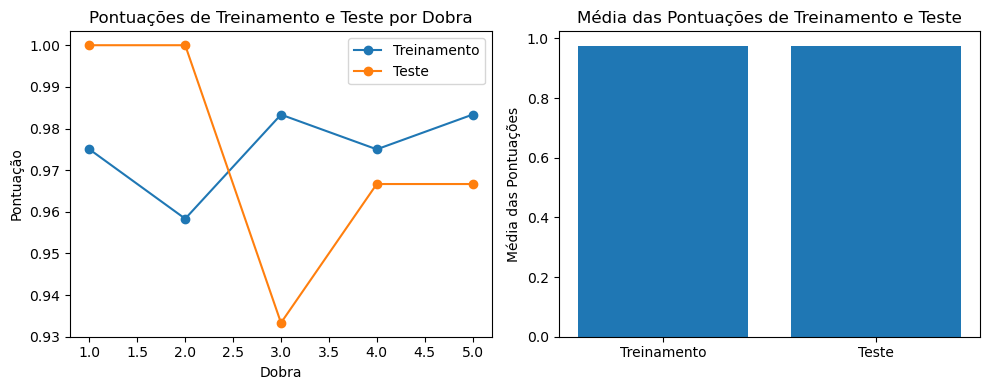

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

# Carregar o conjunto de dados de exemplo (Iris)
iris = load_iris()
X, y = iris.data, iris.target

# Número de dobras (K)
n_splits = 5

# Instanciar o modelo (usaremos uma regressão logística como exemplo)
model = LogisticRegression()

# Inicializar a validação cruzada K-Fold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Listas para armazenar as pontuações (métricas de desempenho) de cada dobra
train_scores = []
test_scores = []

# Loop sobre as dobras
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Treinar o modelo na dobra de treinamento
    model.fit(X_train, y_train)
    
    # Avaliar o modelo na dobra de treinamento
    train_score = model.score(X_train, y_train)
    
    # Avaliar o modelo na dobra de teste
    test_score = model.score(X_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

# Calcular a média das pontuações de treinamento e teste
mean_train_score = np.mean(train_scores)
mean_test_score = np.mean(test_scores)

# Plotar as pontuações
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(range(1, n_splits + 1), train_scores, marker='o', label='Treinamento')
plt.plot(range(1, n_splits + 1), test_scores, marker='o', label='Teste')
plt.xlabel('Dobra')
plt.ylabel('Pontuação')
plt.title('Pontuações de Treinamento e Teste por Dobra')
plt.legend()

# Plotar as médias
plt.subplot(122)
plt.bar(['Treinamento', 'Teste'], [mean_train_score, mean_test_score])
plt.ylabel('Média das Pontuações')
plt.title('Média das Pontuações de Treinamento e Teste')

plt.tight_layout()
plt.show()

Neste exemplo, estamos usando o conjunto de dados Iris e uma regressão logística como modelo. Aqui está o que está acontecendo:

1. Carregamos o conjunto de dados Iris.
2. Definimos o número de dobras (n_splits) para a validação cruzada.
3. Inicializamos a validação cruzada K-Fold usando `KFold`.
4. Loop sobre as dobras:
    * Dividimos os dados em conjuntos de treinamento e teste para cada dobra.
    * Treinamos o modelo na dobra de treinamento.
    * Avaliamos o modelo nas dobras de treinamento e teste, registrando as pontuações.
5. Calculamos a média das pontuações de treinamento e teste.
6. Plotamos as pontuações para cada dobra (gráfico à esquerda) e as médias das pontuações (gráfico à direita).

Os gráficos mostram como as pontuações de treinamento e teste variam em cada dobra e como as médias das pontuações se comparam. Isso nos dá uma ideia de como o modelo está se saindo em diferentes partições dos dados e ajuda a avaliar seu desempenho geral.

## Compromisso entre Viés e Variância

Um conceito importante a ser compreendido ao avaliar modelos é o compromisso entre viés e variância.
- 
Viés (Underfitting): Refere-se à incapacidade do modelo de aprender os padrões nos dados. O modelo é muito simplificado para representar adequadamente os dados.- 

Variância (Overfitting): Refere-se ao modelo que se ajusta demais aos dados de treinamento, incluindo o ruído nos dados, resultando em um modelo que não generaliza bem para dados não vistos.

Encontrar o equilíbrio certo entre viés e variância é fundamental para criar modelos que funcionem bem em dados de teste não vistos.

## Teorema "No Free Lunch"

Não existe um modelo universal que funcione melhor para todos os tipos de dados. Isso é conhecido como o Teorema "No Free Lunch". Como cientistas de dados, é nossa responsabilidade fazer suposições sobre os dados e escolher modelos razoáveis de acordo com essas suposições.

## Curvas de Aprendizado

As curvas de aprendizado são uma ferramenta poderosa para diagnosticar três aspectos do comportamento de um modelo nos dados:

1. **Underfitting (Viés Elevado):** Ocorre quando o modelo é muito simples e não é capaz de aprender os padrões nos dados de treinamento. Isso geralmente é refletido em pontuações baixas tanto nos dados de treinamento quanto nos de teste.
    
2. **Overfitting (Variância Elevada):** Ocorre quando o modelo é muito complexo e se ajusta demais aos dados de treinamento, incluindo o ruído nos dados. Isso é indicado por um desempenho muito bom nos dados de treinamento, mas um desempenho significativamente pior nos dados de teste.
    
3. **Avaliação da Suficiência dos Dados:** As curvas de aprendizado também nos ajudam a entender se o modelo tem dados suficientes para aprender os padrões dos dados. À medida que aumentamos o tamanho do conjunto de treinamento, as curvas de aprendizado nos mostram como o desempenho do modelo muda.

### Plotagem das Curvas de Aprendizado

Vamos mostrar como plotar as curvas de aprendizado usando Python e Matplotlib com base no exemplo anterior. Para isso, usaremos a função `learning_curve` da biblioteca Scikit-Learn. Continuando a partir do exemplo anterior:

/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

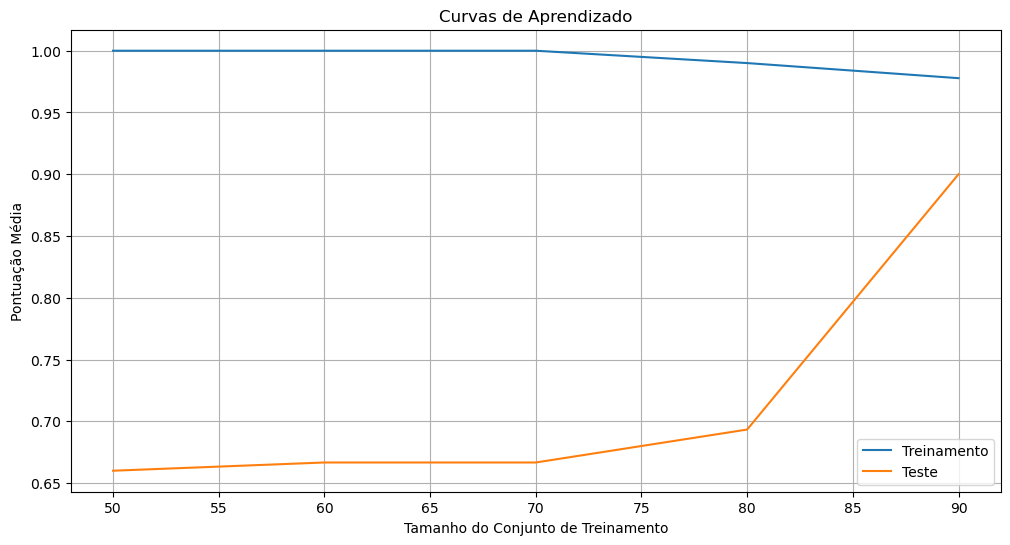

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

# ... Código anterior ...

# Lista de tamanhos de conjunto de treinamento
train_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# Calcular as curvas de aprendizado
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model, X=X, y=y, train_sizes=train_sizes, cv=kf)

# Calcular as médias das pontuações em cada tamanho de conjunto de treinamento
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plotar as curvas de aprendizado
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, label='Treinamento')
plt.plot(train_sizes, test_scores_mean, label='Teste')
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Pontuação Média')
plt.title('Curvas de Aprendizado')
plt.legend()
plt.grid()

plt.show()

Neste código, definimos uma lista de tamanhos de conjunto de treinamento `train_sizes` que representam quantos exemplos são usados no treinamento do modelo. Em seguida, usamos a função `learning_curve` para calcular as pontuações de treinamento e teste para cada tamanho de conjunto de treinamento.

Finalmente, plotamos as curvas de aprendizado, mostrando como as pontuações médias de treinamento e teste variam com o tamanho do conjunto de treinamento. Essas curvas nos ajudam a visualizar se o modelo está sofrendo de underfitting ou overfitting e se há benefícios em aumentar o tamanho do conjunto de treinamento.

A interpretação das curvas de aprendizado pode nos orientar na melhoria do desempenho do modelo, seja por meio de ajustes no modelo, coleta de mais dados ou seleção de melhores recursos.